In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
!pip -q install seaborn

tensorboard 2.3.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.0.1 which is incompatible.
google-auth 1.22.1 has requirement setuptools>=40.3.0, but you'll have setuptools 39.0.1 which is incompatible.
You are using pip version 10.0.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
_ = plt.figure(figsize=(12, 9))

<Figure size 864x648 with 0 Axes>

In [5]:
sns.set_style("darkgrid")

## Load Data

In [6]:
df = pd.read_csv("../data/raw/Reviews.csv")

In [7]:
df.shape

(568454, 10)

In [8]:
sys.getsizeof(df)

467433592

In [9]:
df.sample(n=5).reset_index(drop=True)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,363281,B000G6Q4GW,A1WX42M589VAMQ,Mir,11,11,5,1215907200,Really Surprisingly Good Baked P-Chips! MMmm!,I'd pretty much given up on baked potato chips...
1,485391,B001RVFERK,A350NHMBGYXEDP,C. Lee,0,0,2,1330300800,so disappointing,I love sweet potato and especially sweet potat...
2,287488,B002T0IHJ0,A57AL4UMTTPDG,"J. Jackson ""Jacq""",1,1,2,1331942400,Diet Flavors are Not Great - Nasty Aftertaste,I absolutely love my Sodastream because I drin...
3,424479,B002N2T0GI,A1RDHASSNJE6XE,m,1,1,2,1295740800,Not as good as the Soulistic in Gelee,"Having purchased the Soulistic ""Gelee"" and BFF..."
4,212248,B001X7R32C,ATVD3UHXVNLFH,"Diane Brzozowski ""Diane B.""",0,0,5,1320624000,"Very tasty, great price",My husband and I use this sauce all the time. ...


In [10]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## Field wise Analysis

### ProductId

Unique for each different product

In [11]:
df["ProductId"].nunique()

74258

In [12]:
df["ProductId"].value_counts().head()

B007JFMH8M    913
B002QWP89S    632
B002QWHJOU    632
B0026RQTGE    632
B002QWP8H0    632
Name: ProductId, dtype: int64

In [13]:
df["ProductId"].value_counts().tail(50000)

B004D4UQ8A    4
B00061MISK    4
B001ET5Y0C    4
B000LKUVXU    4
B0002LIU9K    4
             ..
B000CESJNO    1
B007BLXQ3Y    1
B004V0SPUM    1
B0055X2Y4M    1
B002GJCP7E    1
Name: ProductId, Length: 50000, dtype: int64

### Making Sense of Data

Check if product ids are of uniform length

In [14]:
df["ProductId"].str.len().value_counts()

10    568454
Name: ProductId, dtype: int64

**TODO** - Implement a regex check to validate if all the product ids follow a particular pattern `B00[0-9][A-Z]*4[0-9|A-Z]*2`

In [15]:
pd.set_option('display.max_colwidth', None)

**Verify if the dataset contains text explicitly about food products. Here, we focus on products with single reviews**

In [16]:
df.loc[df["ProductId"].isin(df["ProductId"].value_counts().tail(10).index.tolist())]["Text"].to_frame()

,Text
11596,"I love this syrup, it doesnt have all those added ingredients, its not like dark amber syrup thats extra sweet. A little bit goes a long way. When i pour it on my waffles i only need to pour it in the middle and thats enough for 1 whole waffle. So if you think this little bottle wont work for big families you would be mistaken, i use half as much as i would with the fructose added syrups."
46726,"I am allergic to corn, so eating marshmallows, candy, pecan pie etc. without being able to have corn syrup is a real problem.<p>The Lyle's Golden Syrup, which is made from cane sugar syrup, can be used as a substitute for corn syrup. It doesn't taste quite the same, though very good. So I think, if one calls the pecan pie made from Lyle's Golden Syrup sugar pecan pie, for instance, it will be very satisfying as its own thing instead of a substitute for pecan pie.<p>To me, it seems a little sweeter than corn syrup."
60205,"I was super excited about receiving my gluten free communion crackers. Let me tell you. These do not taste like Jesus at all!! Not only that, but I ate these after molesting some alter boys this morning and I did not feel any better. I think when removing the gluten, they accidentally removed the Christ! 1/10 - would not buy again :("
127659,"This is a great flavor. Lots of great watermelon taste. Great in tea, great in soda water. Packaged very well. Glass bottle."
138756,"Words fail to express the utter delight of sinking my teeth into this little creamy cloud of heavenly flavor. No undifferentiated sweetness here. The experience is layered (crunchy pecans, caramel that melts on the tongue), almost hypnotic (when tasting it I can almost see it fresh out of the copper pot, still warm on a slab of marble). This is my review of ONE praline, original flavor. I cannot imagine the 3 additional flavors included in this purchase, but am biding my time. This is an experience not a quick snack. The box of was delivered earlier than predicted, safely, and with all the generously sized pralines in perfect form."
256081,These are delightful light soft pepermint mint. Great for snack or after dinner mint. I think they deserve the five star rating.
337690,"I'm a catering chef with almost 40 years experience and have a new friend.<br />Great on corn on the cob<br />Pasta salad<br />Fried chicken<br />Likewise mac & cheese<br />french fries<br /> THe point is if you like garlic you can bend & twist this seasoning by adding a pinch of chile, basil or grated cheese to make any dish better.........good job"
352216,"This product is poorly made. The stitching comes apart very easily, and our pug dog destroyed it in less than a minute. There are better products on the market."
440368,I have been using this product instead of regular salt and it has made a difference in my health and level of wellbeing.
464925,"I eat gluten free and always carry this bar in my purse and take them along when I travel. It provides adequate protein, good fat, and the lowest sugar (mostly dates) content of any of the ""protein"" type food bars I've looked at. Tastes good too. I use part of it for a snack if needed and sometimes whole bar for main part of a meal if I can't eat what is available."


In [17]:
df.loc[df["ProductId"].isin(df["ProductId"].value_counts().tail(10).index.tolist())]["Summary"].to_frame()

,Summary
11596,A little goes a long way
46726,Lyle's Golden Syrup can substitute for corn syrup
60205,Not actually Jesus!
127659,Delicious
138756,Heavenly pralines
256081,wonderful soft mints
337690,awesome general seasoning
352216,Baby Bear Disaster
440368,Great Product!
464925,Great on the go


Looks like Summary & Text are in sync & Summary is representative of the review text

## UserId

In [18]:
df["UserId"].describe()

count             568454
unique            256059
top       A3OXHLG6DIBRW8
freq                 448
Name: UserId, dtype: object

About half of the reviewers are unique

In [19]:
df["UserId"].value_counts().head(10)

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: UserId, dtype: int64

In [20]:
df["UserId"].value_counts().tail(200000)

A2YPRR1I02W7IC    2
A1OG87A25DYGAG    2
AWHLC7VUU5UL2     2
AE3DFQ1NN1DWV     2
A1FP4DFC0D5E90    2
                 ..
A3F5HW2RDYJ3GO    1
A11N045YYLW4NU    1
A2HDERT6VTAS61    1
AQWG2S5RF2I0R     1
ABH1WJ0TWJT8D     1
Name: UserId, Length: 200000, dtype: int64

Since about >0.2M of reviewers have a single review - it might be challenging to map their review text to scores.

In [21]:
df.loc[df["UserId"].str.strip()=="A1YUL9PCJR3JTY"]["ProductId"].value_counts()

B0012BUR8Q    4
B000CQC050    4
B000CQID2Y    4
B000CQG89Y    4
B003CK0XC0    4
             ..
B000E1587K    1
B003N657V0    1
B000E199RA    1
B0001GSP9G    1
B002HFPDCQ    1
Name: ProductId, Length: 309, dtype: int64

In [22]:
df.loc[(df["UserId"].str.strip()=="A1YUL9PCJR3JTY") & (df["ProductId"]=="B000CQC050")][["Text", "Score", "Summary"]]

,Text,Score,Summary
179429,"***<br />Stash's Lemon Ginger Caffeine Free Herbal Tea is a basic lemon ginger tea, tasting strongly of ginger, and full of flavorings, and oddly, even contains soy. This is one of the better commercial highly processed, non-organic teas. I much prefer organic teas that are made without artificial flavorings and certainly without soy, but if you are not picky about herb teas, and are looking something very strongly flavored as an introduction to the world of teasans and decaffeinated beverages, this would be fine. If you like your tea more subtle, with true pure tastes, and can discern complex differences between natural and commercial teas, then this definitely is not for you, and I would recommend any Numi tea, Yogi Tea, Traditional Medicinals, or even Stash's organic line of teas (which comes in a wonderful Lemon Ginger Organic Tea!)<br /><br />Stash Lemon Ginger Tea contains ginger root, lemongrass, lemon flavor, safflower, hibiscus, citric acid, and soy.<br /><br />Unfortunately, nothing special.<br />***",3,Basic Lemon Ginger Herbal Tea
179434,"****<br />Stash's Chamomile Caffeine Free Herbal Tea is one of their totally natural teas, containing only chamomile flowers. Although I do like this, it means that the tea is rather weak, but still a fine tea---just use two teabags. Many people will find this tea too subtle. I think that Stash's more natural teas seem to be a little mild and undistinguished, while their flavored teas are super-powerful, erring on the side of too powerful, overwhelming the tea drinker with all types of strong added flavorings. If I had to pick, I'd always take subtle, as you can make these teas, like this chamomile tea, stronger by doubling up on the bags, but you can't make the strongly flavored teas weaker!<br /><br />Stash Tea has been around for over 35 years, and they are moving in the direction of more organic and loose teas, more true flavors instead of added flavorings. I appreciate that their chamomile is so pure, but wish it could be a little more flavorful.<br /><br />Still, recommended.<br />****",4,"Subtle, Mild Chamomile Tea"
179450,"*****<br />Stash's Licorice Spice Caffeine Free Herbal Tea has a the sweet flavor licorice teas are known for, along with several nice spices that complement the licorice in a lovely, more-subtle-than-chai way. Licorice Spice Tea contains licorice root, cinnamon, orange peel, star anise, sarsaparilla, natural vanilla flavor, natural orange flavor, natural clove flavor, natural cardamom flavor, and natural cinnamon flavor. Sweet and delicious!<br /><br />You don't need to add anything at all to Licorice Spice Tea, even if you normally like your tea sweetened. It is perfect just as is. It also has a very smooth taste, despite all of the flavorings. The tea bags come stamped with an expiration date, which I like, so that you can be sure the tea is fresh. The date on mine is 26 months away, so you can take your time :)<br /><br />Definitely recommended.<br />*****",5,Sweet and Lovely Tea
179485,"****<br />Stash's Wild Raspberry Caffeine Free Herbal Tea is strong and fruity, great if you love the taste of raspberry and hibiscus, which I do. It contains hibiscus, orange peel, lemongrass, rosehips, natural raspberry flavor, licorice powder, and citric acid. The package says it also contains soy, but that makes little sense to me. It is a fine tasting herb tea.<br /><br />If you like a more subtle tea, you may not be crazy about Wild Raspberry. But if you like Celestial Seasonings and other commercial teas, I think that this is a good one. The reason I gave this tea four stars instead of five is that it isn't as pure as it could be (contains additives and flavorings) and I can tell. I prefer a more subtle tea. And I save five stars for the very best teas I've tried. But for those of you who like a lot of flavor, and can't taste the additives, it's just fine!<br /><br />Recommended.<br />****",4,Hibiscus and Raspberry Delight


**For different productids a single reviewer has same review text**

**Can use the text between last two breaks as an additional data field**

## ProfileName

In [23]:
df["ProfileName"].str.strip().str.upper().nunique(), df["UserId"].str.strip().str.upper().nunique()

(213222, 256059)

In [24]:
count = 0

for name in df["ProfileName"].unique():
    if df.loc[df["ProfileName"]==name]["UserId"].nunique() > 2:
        print(name)
        count += 1
    if count==10:
        break

Karl
R. James
LT
Becca
Greg
Garrett
Peggy
Doug
Chet
Marie


In [25]:
df.loc[df["ProfileName"].str.strip()=="LT"][["ProfileName", "UserId", "Text"]]

,ProfileName,UserId,Text
12,LT,A327PCT23YH90,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat."
64079,LT,AKSY4AKCMKXIW,"I am very picky when it comes to coffee, but I've really been enjoying this product and would definitely recommend it to anyone for their choice of coffee. Very good flavor and just the right strength."
121009,LT,A2JZMZJ4D61RP0,Gluten Free Folks! You will love these. I buy them by the case. They are a staple for me. I do like rice cakes; but I like these much more.
249880,LT,A2E7AQO7EP45QB,"The jerkey tasted great however I feel the cans were very underfilled. All the cans were under half full and I know its says .44 oz but good grief, two pinches and its gone. Over priced in my opinion."
287167,LT,A2NKIHD5MDFD0A,"I use the Special K protein water mix with my daily protein drinks...it gives it an extra kick and taste great with all the favors I use; and ordering from Amazon was a breeze. In fact, I had ordered the product and it was delivered immediately~~what service!!"
306024,LT,A2QXOJWNPCYUWG,This product is delicious! I got a bottle once at a little boutique store and sort of lost it in my fridge. Well I found it again just recently after I had grilled pork chops. Yum. I had some with my pork chops AND on top of the baked potato. I love the flavor and the texture.<br /><br />I've also had this with brie or cream cheese on crackers. Yummmmm. My bottle is now empty and I'm planning on looking at the grocery store tomorrow. If they do NOT have it... I'll be back... probably buying 3 bottles.
315946,LT,A2JYPA4AL8ICG7,"The item was advertised as having no MSG, there is a sticker attached to the package that says no MSG, however the original blue package lists monosodium glutamate (which is MSG!) as ingredient."
324824,LT,A3BWHISEIKAUCY,"For those of you who like Indian food, and do not know how to cook it, or want to spend the time preparing the cuisine, these are a good way to get a decent meal on the table in the time it takes to make rice. Though not as great tasting as the Real Deal, they are okay. Our son is at college, living in an apartment, so makes a lot of his own meals. He loves these as he knows he can have a meal on the table in 20 minutes. These are also a good way to introduce those who have never had real Indian cuisine, since most are not that spicy/hot. Buying an individual pouch can be expensive, but once you find ones you like, buy a case. They keep forever in the pantry."
367646,LT,A3PPSOC2489H9N,This product works great on my hair as a hot oil treatment and conditioner. It is also great for skin care and is gentle enough for children.
385749,LT,A2W911E5RJHZ02,"One fizzie for 6 oz. of water is about right. If you use a big glass, use more fizzies.<br /><br />It does have the artificial sweetener taste to it, but our kids love this stuff. I bought them years ago, and they have asked for them regularly ever since. The place I bought them no longer carries them and it FINALLy occured to me to check Amazon, and here they are!<br /><br />The biggest problem your kids will have is waiting for the fizzie to finish fizzing before drinking it to get the full flavor. They will want to drink it while it is still fizzing. That's how kids are.<br /><br />You would buy this instead of some other kid drink because, well, it fizzes and makes itself! That's the fun of it.<br /><br />You get 6 boxes with 12 fizzies in each box. Each fizzie is individually wrapped.<br /><br />Orange does seem to be the best working flavor."


**Some profilenames have >1 UserIds - possibly because `ProfileName` field captures just the first name & these are very common names**

> Text can still be used & are unique

## HelpfulnessNumerator & HelpfulnessDenominator

In [26]:
df[["HelpfulnessNumerator", "HelpfulnessDenominator"]].describe()

,HelpfulnessNumerator,HelpfulnessDenominator
count,568454.000000,568454.00000
mean,1.743817,2.22881
std,7.636513,8.28974
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,1.00000
75%,2.000000,2.00000
max,866.000000,923.00000


In [27]:
df["HelpfulnessNumerator"].value_counts().head(15)

0     303826
1     116467
2      53727
3      29007
4      16963
5      11462
6       7387
7       5402
8       3887
9       3082
10      2453
11      2012
12      1627
13      1185
14      1009
Name: HelpfulnessNumerator, dtype: int64

<AxesSubplot:ylabel='Frequency'>

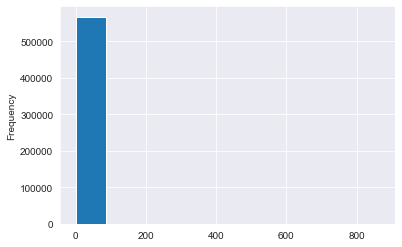

In [28]:
df["HelpfulnessNumerator"].plot(kind="hist")

HelpfulnessNumerator - Upvote

In [29]:
df["HelpfulnessDenominator"].value_counts().head(15)

0     270052
1     112753
2      61482
3      34394
4      22306
5      14824
6      10378
7       7461
8       5416
9       4406
10      3519
11      2975
12      2282
13      1854
14      1567
Name: HelpfulnessDenominator, dtype: int64

In [30]:
df.loc[df["HelpfulnessNumerator"]>df["HelpfulnessDenominator"]].shape[0]

2

In [31]:
df.loc[df["HelpfulnessNumerator"]<df["HelpfulnessDenominator"]].shape[0]

115091

In [32]:
diff = df["HelpfulnessDenominator"] - df["HelpfulnessNumerator"]

In [33]:
diff.describe()

count    568454.000000
mean          0.484993
std           1.905591
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         140.000000
dtype: float64

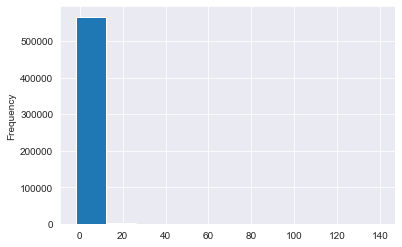

In [34]:
_ = diff.plot(kind="hist")

## Score

In [35]:
df["Score"].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

Categorisation -

* Scores 1 & 2 - Negative
* Scores 4 & 5 - Positive

In [36]:
df.loc[df["Score"].isin([1, 2]), "Class"] = "Negative"
df.loc[df["Score"].isin([4, 5]), "Class"] = "Positive"

In [37]:
df = df.loc[df["Score"].isin([1,2,4,5])]

In [38]:
df.shape

(525814, 11)

In [39]:
df = df.drop(columns=["Score"])

**Depending upon Business requirement we have currently converted it to a binary classification. We can switch back to scoring based system anytime back**

In [40]:
df["Class"].value_counts()

Positive    443777
Negative     82037
Name: Class, dtype: int64

> Not Imbalanced neither balanced

**Solutions for handling imbalance**
- SMOTE
- Undersampling
- Oversampling

https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

## Summary

In [42]:
df["Summary"] = df["Summary"].str.strip().str.capitalize()

In [44]:
df["Summary"].nunique(), df["UserId"].nunique()

(252623, 243414)

In [45]:
df["Summary"].value_counts()

Delicious                              2852
Delicious!                             2742
Great product                          2536
Yummy!                                 2006
Yummy                                  1936
                                       ... 
My favorite ramen noodles                 1
The best "hot dog" out there!             1
Excellent for a soybean oil sardine       1
Cafe escapes hot cocoa                    1
Big nut bar                               1
Name: Summary, Length: 252623, dtype: int64

### Length Distribution

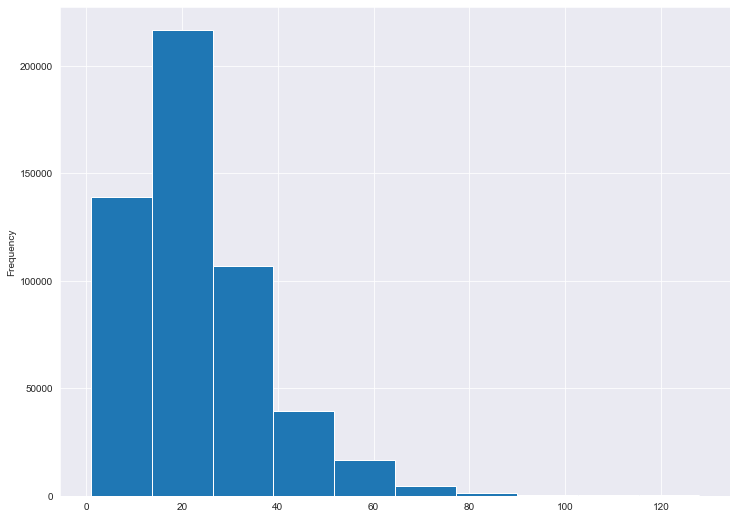

In [54]:
plt.figure(figsize=(12, 9))
_ = df["Summary"].str.len().plot(kind="hist")

### Length distribution by Class

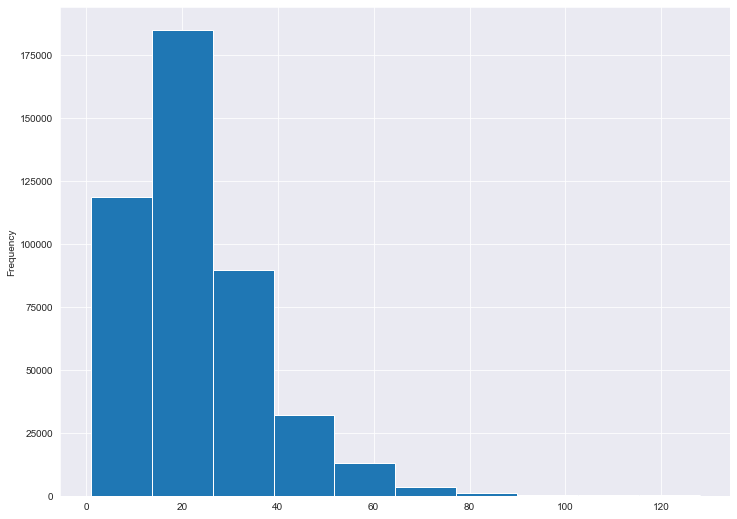

In [55]:
plt.figure(figsize=(12, 9))
_ = df.loc[df["Class"]=="Positive"]["Summary"].str.len().plot(kind="hist")

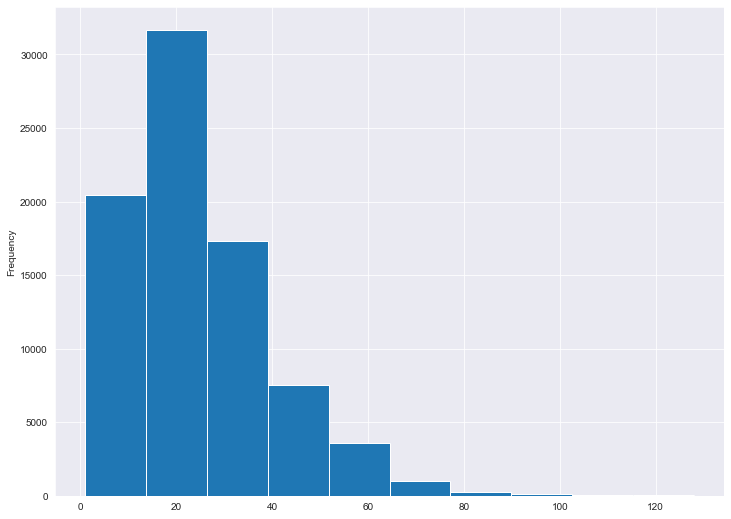

In [56]:
plt.figure(figsize=(12, 9))
_ = df.loc[df["Class"]=="Negative"]["Summary"].str.len().plot(kind="hist")

### Word distribution by Class

In [68]:
def return_len(x):
    try:
        return len(x)
    except Exception as e:
        return 0

In [69]:
df["Count"] = df["Summary"].str.split().apply(lambda x: return_len(x))

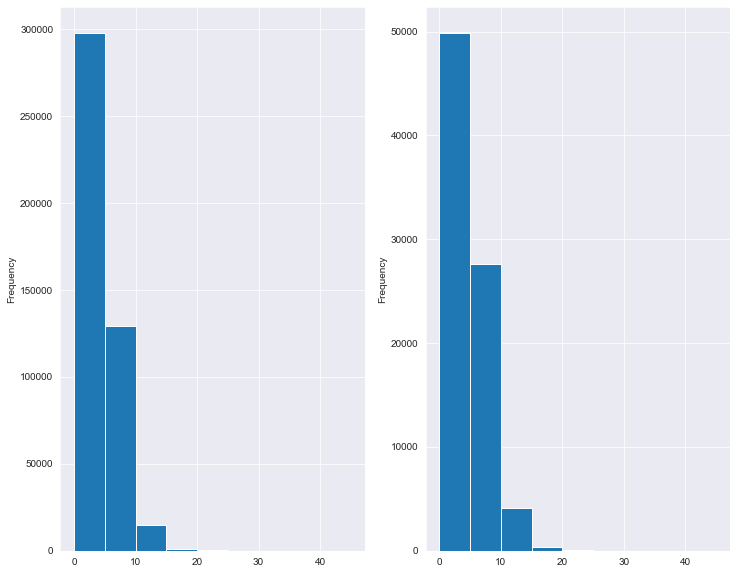

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
_ = df.loc[df["Class"]=="Positive"]["Count"].plot(kind="hist", bins=np.arange(0, 50, 5), ax=ax[0])
_ = df.loc[df["Class"]=="Negative"]["Count"].plot(kind="hist", bins=np.arange(0, 50, 5), ax=ax[1])

### WordClouds